# ĐỒ ÁN THỰC HÀNH LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU

# A. Thu thập dữ liệu

### I. Giới thiệu chủ đề và thông tin tập dữ liệu

#### 1. Chủ đề

Tên chủ đề: Data Scientist Jobs

#### 2. Lý do lựa chọn chủ đề và tập dữ liệu

Ngành khoa học dữ liệu đang là 1 ngành rất hot và rất quan trọng đối với 1 doanh nghiệp về mảng công nghệ thông tin, nhưng ở Việt Nam thì nhu cầu tuyển dụng của các công ty về ví trị này là khá ít. Và cũng chính vì vậy nhóm muốn tìm hiểu thêm về nhu cầu và mức lương của các doanh nghiệp đối với ngành này ở trên thé giới, thông qua các mô tả công việc để biết thêm về những kĩ năng mà 1 data sciencetist cần.

Cung cấp cho người xem, người đọc cái nhìn tổng quan về nhu cầu tuyển dụng và mức lương có thể đạt được khi theo ngành khoa học dữ liệu; các chức vụ, vị trí hot trong ngành; đánh giá nhu cầu 1 số doanh nghiệp lớn…

#### 3. Thông tin tập dữ liệu

Dữ liệu này được tạo bởi https://github.com/picklesueat/data_jobs_data và bao gồm hơn 3900 danh sách công việc cho các vị trí Khoa học dữ liệu, với các thuộc tính:
- Salary Estimate
- Location
- Company Rating
- Job Description
- ...

Nguồn dữ liệu: https://www.kaggle.com/datasets/andrewmvd/data-scientist-jobs

Phương pháp thu thập:
- Người ta cào dữ liệu từ https://www.glassdoor.com/Job/data-scientist-jobs-SRCH_KO0,14.htm

Giấy phép: được cấp phép theo MIT License

### II. Tổng quan về cấu trúc tập dữ liệu


#### 1. Thời điểm thu thập dữ liệu

Tập dữ liệu được nhóm thống nhất tải ở dạng file csv vào ngày 23/11/2022

Dữ liệu gồm 3909 dòng và 17 cột

### 2. Cấu trúc tập dữ liệu
Tập dữ liệu được tải xuống chỉ chứa duy nhất 1 bảng, gồm 17 thuộc tính được mô tả như sau:
- **Unnamed: 0**: ID
- **index**: same as ID
- **Job Title**: Job Title
- **Salary Estimate**: Salary Estimate
- **Job Description**: Job Description
- **Rating**: Company rating
- **Company name**: Company name
- **Job location**: Job location
- **Headquarters**: Company headquarters location
- **Size**: Company size
- **Founded**: Year company was founded
- **Type of ownership**: Type of company ownership
- **Industry**: Industry
- **Sector**: Sector within industry
- **Revenue**: Yearly revenue
- **Competitors**: Main competitor
- **Easy Apply**: Whether easy apply is available or not

# B. Khám phá dữ liệu

## 1. Đọc dữ liệu và tính số dòng, số cột

Import các thư viện cần thiết

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

Đọc file `DataScientist.csv` và in ra 5 dòng đầu tiên

In [107]:
df = pd.read_csv('archive/DataScientist.csv')
df.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


Tính số dòng và số cột và lưu vào 2 biến `num_rows`, `num_cols`

In [108]:
num_rows,num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')


Number of rows: 3909
Number of columns: 17


## 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng trong tập dữ liệu là thông tin về vị trí tuyển dụng liên quan đến ngành Khoa học dữ liệu. Có vẻ không có vấn đề các dòng có ý nghĩa khác nhau, tức là không có dòng nào bị 'lạc loài'

## 3. Dữ liệu có dòng nào bị lặp không?

Ta kiểm tra xem có dòng nào bị lặp không bằng cách sử dụng các phương `duplicated()` và `any()` trên dataframe `df` và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu không có dòng bị lặp.

In [109]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

Như vậy, dữ liệu không có dòng nào bị lặp

## 4. Tỉ lệ giá trị thiếu của mỗi cột

Thay thế các giá trị không hợp lệ trong cột `Easy Apply` thành giá trị boolean `False`

In [110]:
df['Easy Apply'] = df['Easy Apply'].fillna(False).astype(bool)

Ta thấy trong `df` có nhiều giá trị không hợp lệ (giá trị bằng `-1`). Do đó ta thay thế các giá trị `-1` đó thành NaN

In [111]:
df.replace(['-1'], [np.nan], inplace=True)
df.replace(['-1.0'], [np.nan], inplace=True)
df.replace([-1], [np.nan], inplace=True)

Ta cần xem xét đến các giá trị thiếu trong dữ liệu. Đầu tiên, ta tính tỉ lệ giá trị thiếu của từng cột bằng cách sử dụng phương thức `isnull()` trên dataframe `df` và tính tổng số giá trị thiếu của từng cột bằng phương thức `sum()`. Cuối cùng ta chia số dòng và lưu kết quả vào `missing_ratio`.

In [112]:
missing_ratio = df.isnull().sum()
missing_ratio = missing_ratio / num_rows
missing_ratio

Unnamed: 0           0.000000
index                0.000000
Job Title            0.000000
Salary Estimate      0.000000
Job Description      0.000000
Rating               0.104630
Company Name         0.000000
Location             0.000000
Headquarters         0.061397
Size                 0.058583
Founded              0.249936
Type of ownership    0.058583
Industry             0.139678
Sector               0.139678
Revenue              0.058583
Competitors          0.706063
Easy Apply           0.000000
dtype: float64

Ta cũng cần tính các giá trị thống kê mô tả của các cột numeric bằng phương thức `describe()` trên dataframe `df`.

In [113]:
df.describe()

,Unnamed: 0,index,Rating,Founded
count,3909.000000,3909.000000,3500.000000,2932.000000
mean,1954.000000,2167.446662,3.784143,1972.371419
std,1128.575429,1247.657849,0.614619,52.719618
min,0.000000,0.000000,1.000000,1625.000000
25%,977.000000,1121.000000,3.400000,1961.000000
50%,1954.000000,2161.000000,3.800000,1995.000000
75%,2931.000000,3249.000000,4.100000,2006.000000
max,3908.000000,4379.000000,5.000000,2020.000000


## 5. Kiểu dữ liệu của mỗi cột? Có cột nào có kiểu dữ liệu chưa phù hợp để xử lý tiếp không?

In [114]:
col_dtype = df.dtypes
col_dtype

Unnamed: 0             int64
index                  int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded              float64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply              bool
dtype: object

#### Nhận xét
- Về mặt kiểu dữ liệu, các thuộc tính của tập dữ liệu này đã ở định dạng phù hợp, nên không cần phải xử lý.

## 6. Mỗi cột có ý nghĩa gì?

Đầu tiên, ta có thể thấy cột 'Unnamed: 0' không có ý nghĩa trong df. Do đó, để làm gọn dataframe để dễ quản lý, ta cần bỏ cột này

In [115]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,NaN,True
1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,NaN,True
2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,NaN,Decode_M,"New York, NY","New York, NY",1 to 50 employees,NaN,Unknown,NaN,NaN,Unknown / Non-Applicable,NaN,True
3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",True
4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",True


Ta thấy ở cột `Salary Estimate` là khoảng tiền lương, ta cần đưa về dạng số để dễ xử lý

Ta cần tách các giá trị ở cột `Salary Estimate` thành 2 cột là `Minumum Salary` và `Maximum Salary`

In [117]:
df_salary = df['Salary Estimate'].str.split("-",expand=True,)

minimum_salary = df_salary[0]
minimum_salary = minimum_salary.str.replace('K',' ')


maximum_salary = df_salary[1].str.replace('(Glassdoor est.)', ' ')
maximum_salary = maximum_salary.str.replace('(', ' ')
maximum_salary = maximum_salary.str.replace(')', ' ')
maximum_salary = maximum_salary.str.replace('K', ' ')
maximum_salary = maximum_salary.str.replace('Employer est.', ' ')
maximum_salary = maximum_salary.str.replace('Per Hour', ' ')

maximum_salary = maximum_salary.str.replace('$', ' ').fillna(0).astype(int)
minimum_salary = minimum_salary.str.replace('$', ' ').fillna(0).astype(int)

df['Minimum Salary'] = minimum_salary
df['Maximum Salary'] = maximum_salary

df.drop('Salary Estimate',axis = 1,inplace = True)
df['Est_Salary']= (df['Minimum Salary']+df['Maximum Salary'])/2

Ở cột `Company Name`, ta xóa phần dữ liệu thừa ở phía sau tên công ty

In [118]:
df['Company Name'] = df['Company Name'].str.replace('\n.*', ' ')

Tách dữ liệu trong cột `Size` thành `Minimum Size` và `Maximum Size`

In [119]:
df['Size'] = df['Size'].str.replace('employees', '')
df['Size'] = df['Size'].str.replace('+', 'plus')
df['Size'] = df['Size'].replace('Unknown', None)
df['Size'] = df['Size'].str.replace('10000plus', '10000 to 10001')
size = df['Size'].str.split("to",expand=True)

df.drop('Size',1,inplace = True)

df['Minimum Size'] = size[0]
df['Maximum Size'] = size[1]
df['Minimum Size'] = pd.to_numeric(df['Minimum Size'])
df['Maximum Size'] = pd.to_numeric(df['Maximum Size'])


Ở cột `Company Name` có lẫn dữ liệu thừa, ta cần lược bỏ nó

In [120]:
df['Company Name'] = df['Company Name'].str.replace('\n.*', ' ')

Tạo cột các cột 'city' và 'state' cho cả `Location` và `Headquarters`

In [121]:
Location = df['Location'].str.split(",",expand=True,)
Location_City = Location[0]
Location_State = Location[1]
df['Location City'] = Location_City
df['Location State'] = Location_State
df.drop('Location',axis = 1, inplace = True)


HQ = df['Headquarters'].str.split(",",expand=True)
Headquarters_City = HQ[0]
Headquarters_State = HQ[1]
df['Headquarters City'] = Headquarters_City
df['Headquarters State'] = Headquarters_State
df.drop('Headquarters',axis = 1, inplace = True)

## 7. Với mỗi cột có kiểu dữ liệu số, các giá trị được phân bố như thế nào?

Với các cột có kiểu dữ liệu số, ta sẽ tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

Bạn sẽ lưu kết quả vào DataFrame `num_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột số trong `df`
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

In [122]:
data = {
    "row_name" : ["missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"]
}
col_name = []
for i in df.columns:
    if (df[i].dtypes == 'float64') or (df[i].dtypes == 'int64') or (df[i].dtypes == 'int32'):
        col_name.append(i)

for i in col_name:
    _data = []
    missing_data = df[i].isna().sum()
    _data.append((missing_data / len(df[i]) * 100).round(1))
    _data.append(df[i].min())
    percentile = df[i].quantile([0.25,0.5,0.75])
    _data.append(percentile[0.25])
    _data.append(percentile[0.5])
    _data.append(percentile[0.75])
    _data.append(df[i].max())
    data[i] = _data
num_col_info_df = pd.DataFrame(data).set_index('row_name')

In [123]:
num_col_info_df

,index,Rating,Founded,Minimum Salary,Maximum Salary,Est_Salary,Minimum Size,Maximum Size
row_name,,,,,,,,
missing_ratio,0.0,10.5,25.0,0.0,0.0,0.0,7.8,7.8
min,0.0,1.0,1625.0,10.0,26.0,18.0,1.0,50.0
lower_quartile,1121.0,3.4,1961.0,52.0,97.0,73.0,51.0,200.0
median,2161.0,3.8,1995.0,76.0,129.0,104.5,501.0,1000.0
upper_quartile,3249.0,4.1,2006.0,110.0,165.0,133.0,10000.0,10001.0
max,4379.0,5.0,2020.0,200.0,254.0,225.0,10000.0,10001.0


**Có giá trị không hợp lệ trong mỗi cột không? (không xét giá trị thiếu)**

Không có giá trị không hợp lệ trong mỗi cột

## 8. Với mỗi cột có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

Thực hiện thống kê và lưu vào một dataframe với các dòng là đại diện cho các giá trị như sau:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu (missing_ratio).
- Số lượng các giá trị khác nhau (không xét giá trị thiếu) (num_values).
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): dùng dictionary để lưu, key là giá trị, value là tỉ lệ % (value_ratios).

In [124]:
categorical_df=df.select_dtypes(exclude=['int64','float64','datetime64','int32','bool'])
data = {
    "row_name" : ["missing_ratio", "num_values", "value_ratios"]
}
col_names = list(categorical_df.columns)
for i in col_names:
    _data = []

    #Tính missing ratio
    missing_ratio = (categorical_df[i].isna().sum())/len(df[i]) * 100
    _data.append(missing_ratio)

    #Tính số lượng giá trị khác nhau
    num_values = categorical_df[i].dropna().nunique()
    _data.append(num_values)

    #Tính tỉ lệ của các giá trị
    dict_value_ratios ={}
    values = categorical_df[i].value_counts(normalize=True,sort=True)
    name_values = list(values.index)
    for k in range(len(name_values)):
        dict_value_ratios[name_values[k]] = round(values[k]*100,1)
    _data.append(dict_value_ratios)
    
    data[i] = _data

cat_col_info_df = pd.DataFrame(data).set_index('row_name')
cat_col_info_df

,Job Title,Job Description,Company Name,Type of ownership,Industry,Sector,Revenue,Competitors,Location City,Location State,Headquarters City,Headquarters State
row_name,,,,,,,,,,,,
missing_ratio,0.0,0.0,0.0,5.858276,13.967767,13.967767,5.858276,70.606293,0.0,0.0,6.139678,6.139678
num_values,2079,3685,2069,14,95,25,13,421,185,11,523,80
value_ratios,"{'Data Scientist': 7.0, 'Data Engineer': 6.7, ...",{'The U.S. Department of the Treasury has a di...,"{'Apple ': 1.5, 'IBM ': 1.5, 'Amazon ': 1.2, '...","{'Company - Private': 52.5, 'Company - Public'...","{'IT Services': 14.0, 'Staffing & Outsourcing'...","{'Information Technology': 33.4, 'Business Ser...","{'Unknown / Non-Applicable': 31.6, '$10+ billi...","{'Amazon, Accenture, Microsoft': 5.3, 'Google,...","{'Austin': 8.8, 'Chicago': 8.4, 'San Diego': 7...","{' TX': 32.1, ' CA': 27.3, ' IL': 9.3, ' PA': ...","{'New York': 8.2, 'San Diego': 4.9, 'Chicago':...","{' CA': 24.9, ' TX': 12.5, ' NY': 10.6, ' IL':..."


# C. Đặt và trả lời câu hỏi

## 1. Những công ty tốt nhất để lựa chọn làm việc (Dựa vào Salary và Rating)

### Lợi ích khi trả lời câu hỏi

Mỗi vị trí công việc có nhiều công ty để lựa chọn. Việc lọc như thế này có thể đưa ra sự lựa chọn công ty tốt nhất cho mỗi vị trí công việc.

#### Lọc ra từng công việc nên chọn công ty nào là tốt nhất 
Tiêu chí đánh giá
* Rating cao nhất 
* Mức lương trung bình (Est_Salary) cao nhất

In [125]:
job = df[['Job Title','Rating','Est_Salary','Company Name']].groupby(['Job Title']).max()

Loại bỏ cột Rating và Est_Salary ra khỏi dataframe và thêm cột Job Title vào dataframe

In [126]:
x = pd.Series(job['Company Name'].values)
df_company_best_for_EachOfJob = pd.concat([pd.Series(job.index),x], ignore_index = True ,axis = 1)
df_company_best_for_EachOfJob.columns = ['Job Title','Company Name']
df_company_best_for_EachOfJob

,Job Title,Company Name
0,#104733 HPC Systems and Data Engineer,UC San Diego
1,#105054 (CLS) Clinical Lab Scientist - Microbi...,UC San Diego
2,(CLS) Clinical Lab Scientist - Microbiology,UC San Diego
3,(Data Analyst) BA/BSA,InterSources Inc.
4,(Data Risk Analyst: Data Modeler),System Soft Technologies
...,...,...
2074,X-Ray Tomography Scientist,The Aerospace Corporation
2075,XYZ Data Analyst,Rosen
2076,eCommerce Analytics Manager,Bombas
2077,eDiscovery Data Analyst,Servient


In [127]:
df_company_best_for_EachOfJob['Company Name'].value_counts()

Apple                               49
Southwest Research Institute        22
Varsity Tutors                      21
Facebook                            21
Amazon                              17
                                    ..
CloudFlare                           1
Lawrence Livermore National Lab      1
Argonne National Laboratory          1
Riskified                            1
Jconnect Infotech Inc                1
Name: Company Name, Length: 1207, dtype: int64

#### Vẽ biểu đồ thể hiện top 10 công ty được đánh giá tốt nhất cho công việc  

In [128]:
top_company = df_company_best_for_EachOfJob['Company Name'].value_counts().head(10)

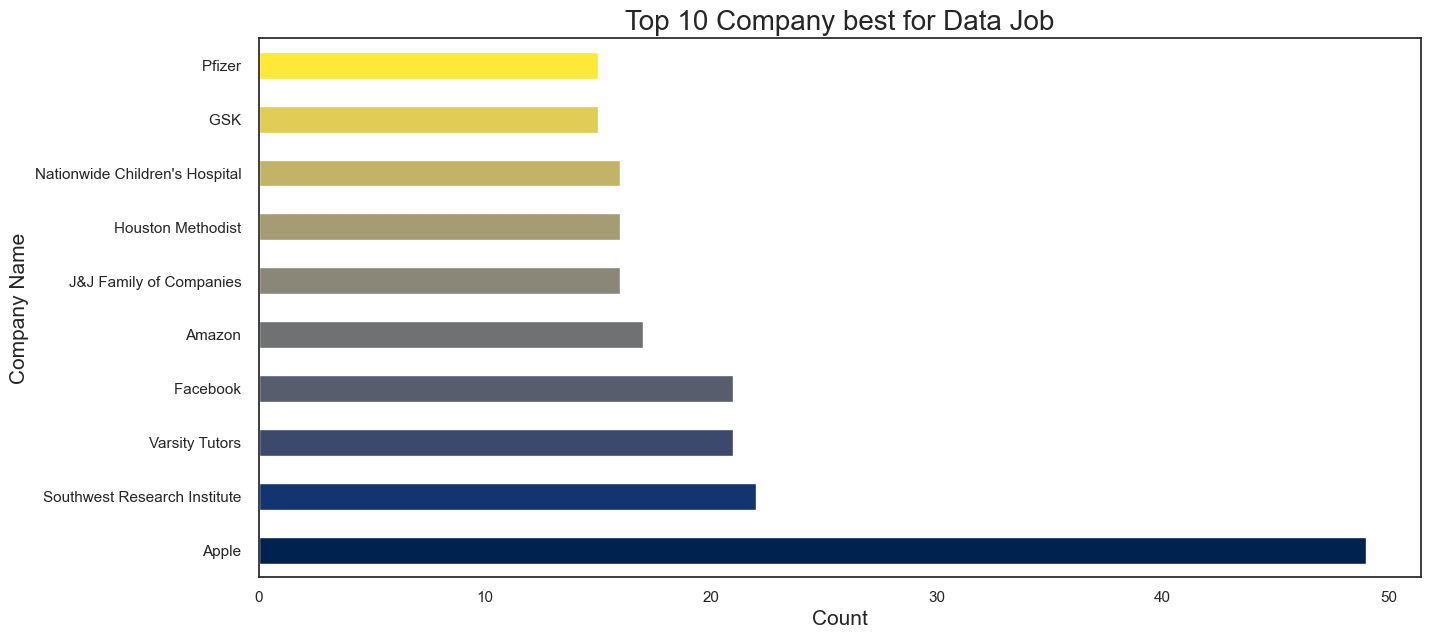

In [129]:
plt.rcParams['figure.figsize'] = (15,7)
color = plt.cm.cividis(np.linspace(0,1,10))
top_company.plot.barh(color = color)
top_company.plot.barh(color=color)
plt.title("Top 10 Company best for Data Job",fontsize=20)
plt.ylabel("Company Name",fontsize=15)
plt.xlabel("Count",fontsize=15);

### Nhận xét
* Từ biểu đồ trên ta có thể tìm được công ty tốt nhất cho mỗi công việc
* Sau khi đếm số công ty ta có thể thấy các công ty như Apple, Facebook, Amazon... là điểm đến tốt cho các công việc

## 2. Lĩnh vực (Sector) có doanh thu (Revenue) cao nhất. Số lượng nhân viên (Size) làm việc trong mỗi từng lĩnh vực có liên quan gì đến nhau ?


### Lợi ích khi trả lời câu hỏi

Doanh thu của từng lĩnh vực là khác nhau. Sau khi gộp lại các lĩnh vực, tính tổng doanh thu và trực quan hóa ta có thể cho ra nhận xét những lĩnh vực nào là có doanh thu cao nhất. Kết hợp với tổng nhân viên của từng lĩnh vực ta có thể đưa ra sự tương quan giữa con người và doanh thu.

### Tiền xử lý

#### Tách dữ liệu cột `Revenue` thành `Minimum Revenue` và `Maximum Revenue`

Xóa các kí tự `$`, `USD`, `)`, `(`; chuyển giá trị `*Unknown / Non-Applicable*` thành None và ' ' thành '' 


In [130]:
df['Revenue'] = df['Revenue'].replace('Unknown / Non-Applicable', None)
df['Revenue'] = df['Revenue'].str.replace('$', ' ')
df['Revenue'] = df['Revenue'].str.replace('(USD)', ' ')
df['Revenue'] = df['Revenue'].str.replace('(', ' ')
df['Revenue'] = df['Revenue'].str.replace(')', ' ')
df['Revenue'] = df['Revenue'].str.replace(' ', '')

Chuyển đơn vị *billion* thành *million*, xử lí các khoảng số, xóa kí tự *million*, gán lại giá trị *Unknown / Non-Applicable* thành NaN

In [131]:
df['Revenue'] = df['Revenue'].str.replace('2to5billion', '2billionto5billion')
df['Revenue'] = df['Revenue'].str.replace('5to10billion ', '5billionto10billion ')
df['Revenue'] = df['Revenue'].replace('million', ' ')
df['Revenue'] = df['Revenue'].replace('10+billion', '10billionto11billion')
df['Revenue'] = df['Revenue'].str.replace('Lessthan1million', '0millionto1million')
df['Revenue'] = df['Revenue'].str.replace('million', ' ')
df['Revenue'] = df['Revenue'].str.replace('billion', '000 ')
df['Revenue'] = df['Revenue'].replace('Unknown / Non-Applicable', np.nan)

Tách dữ liệu cột `Revenue` thành `Minimum Revenue` và `Maximum Revenue`

In [132]:
Revenue = df['Revenue'].str.split("to",expand=True)

df['Minimum Revenue'] = Revenue[0]
df['Maximum Revenue'] = Revenue[1]
df['Maximum Revenue'] = pd.to_numeric(df['Maximum Revenue'])
df['Minimum Revenue'] = pd.to_numeric(df['Minimum Revenue'])

#Xóa cột Revenue cũ 
df.drop('Revenue',1,inplace=True)

In [133]:
df['Minimum Revenue'] = df['Minimum Revenue'].replace([0],[0.1])
df.head()

,index,Job Title,Job Description,Rating,Company Name,Founded,Type of ownership,Industry,Sector,Competitors,...,Maximum Salary,Est_Salary,Minimum Size,Maximum Size,Location City,Location State,Headquarters City,Headquarters State,Minimum Revenue,Maximum Revenue
0,0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,2007.0,Company - Private,Travel Agencies,Travel & Tourism,NaN,...,181,146.0,501.0,1000.0,New York,NY,Montreal,Canada,NaN,NaN
1,1,"Data Scientist, Product Analytics","At Noom, we use scientifically proven methods ...",4.5,Noom US,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,NaN,...,181,146.0,1001.0,5000.0,New York,NY,New York,NY,NaN,NaN
2,2,Data Science Manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,NaN,Decode_M,NaN,Unknown,NaN,NaN,NaN,...,181,146.0,1.0,50.0,New York,NY,New York,NY,NaN,NaN
3,3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,2019.0,Company - Private,Internet,Information Technology,"Zocdoc, Healthgrades",...,181,146.0,201.0,500.0,Lyndhurst,NJ,Lyndhurst,NJ,NaN,NaN
4,4,"Director, Data Science","Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,2007.0,Company - Private,Advertising & Marketing,Business Services,"BBDO, Grey Group, Droga5",...,181,146.0,51.0,200.0,New York,NY,New York,NY,NaN,NaN


#### Tính doanh thu trung bình và số lượng nhân viên trung bình của từng lĩnh vực


Tạo thêm cột `Avg Revenue` và `Avg Size` lần lượt là doanh thu trung bình và số lượng nhân viên trung bình


In [134]:
df['Avg Revenue'] = (df['Minimum Revenue']+df['Maximum Revenue'])/2
df['Avg Size'] = (df['Minimum Size']+df['Maximum Size'])/2

Tính tổng doanh thu trung bình, số lượng nhân viên trung bình của từng lĩnh vực, sau đó lưu vào 2 biến `Total_Revenue_Each_Sector` và `Total_Size_Each_Sector`

In [135]:
Total_Revenue_Each_Sector = df[['Sector','Avg Revenue']].groupby('Sector').sum()
Total_Size_Each_Sector = df[['Sector','Avg Size']].groupby('Sector').sum()

Vẽ biểu đồ cột thể hiện Top 20 lĩnh vực về Data có tổng doanh thu cao nhất và xem sự tương quan với số nhân viên làm việc của trong các lĩnh vực đó

Dùng biểu đồ cột với trục hoành là Revenue, trục tung là Sector

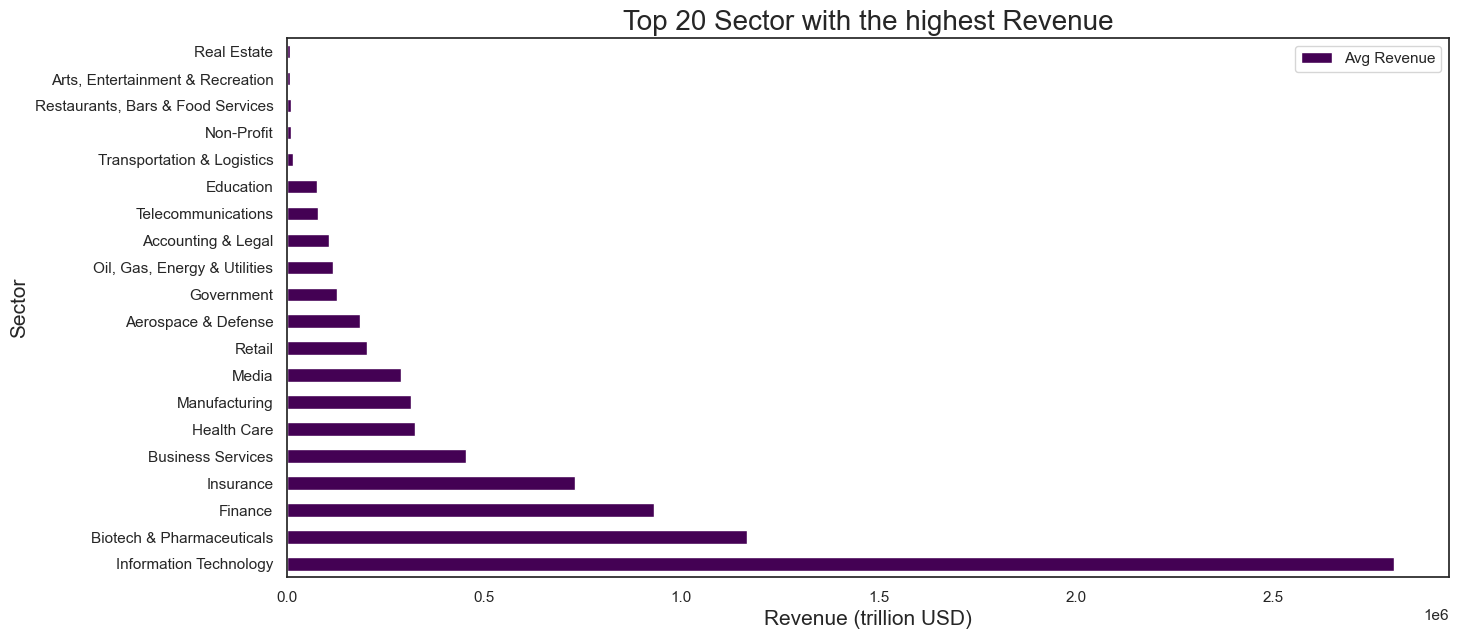

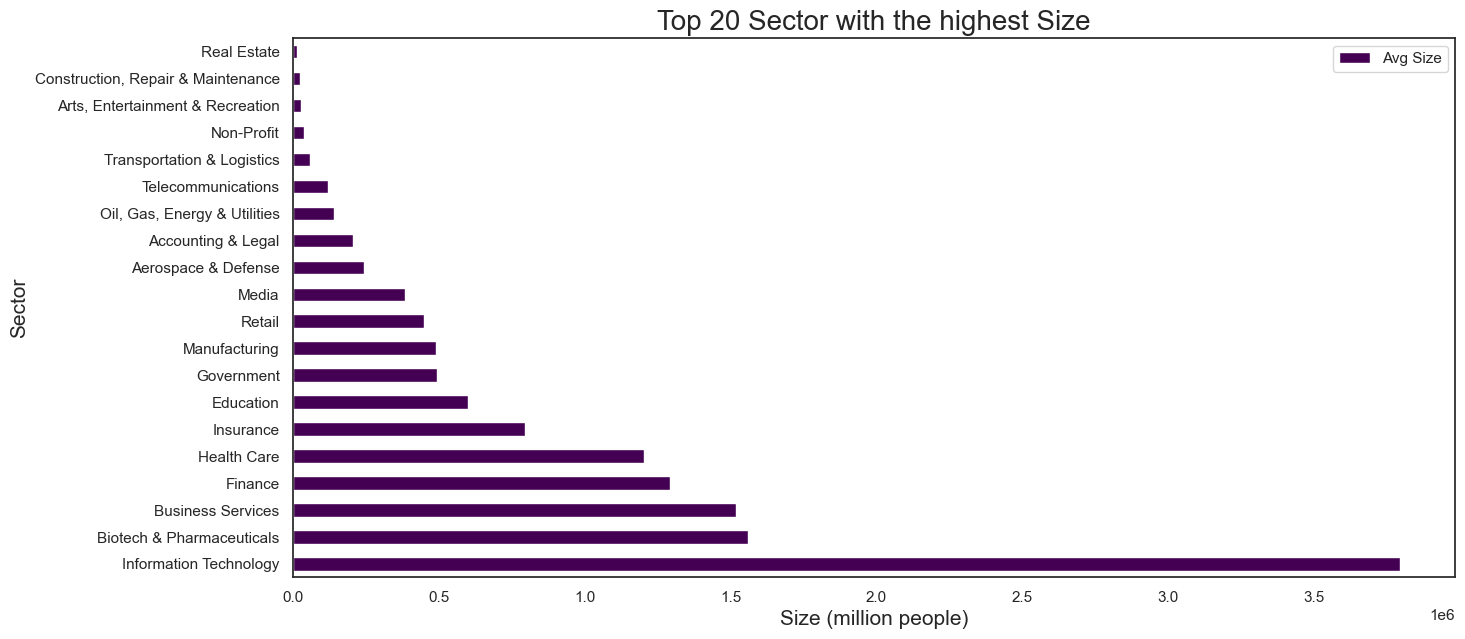

In [136]:
plt.rcParams['figure.figsize'] = (15,7)
color = plt.cm.viridis(np.linspace(0,1,5))
top_sector_revenue = Total_Revenue_Each_Sector.sort_values(by=['Avg Revenue'],ascending = False).head(20)
top_sector_size = Total_Size_Each_Sector.sort_values(by=['Avg Size'],ascending = False).head(20)

top_sector_revenue.plot.barh(color=color)
plt.title("Top 20 Sector with the highest Revenue",fontsize=20)
plt.ylabel("Sector",fontsize=15)
plt.xlabel("Revenue (trillion USD)",fontsize=15);

top_sector_size.plot.barh(color=color)
plt.title("Top 20 Sector with the highest Size",fontsize=20)
plt.ylabel("Sector",fontsize=15)
plt.xlabel("Size (million people)",fontsize=15);

### Nhận xét
* Có thể thấy ngành IT có doanh thu lớn nhất và cao vượt bậc so với các ngành còn lại, cho thấy sự phát triển của ngành này
* Số lượng nhân viên Data Science làm việc cho lĩnh vực IT cũng cao hơn gấp 2 lần so với ngành cao thứ 2 là Biotech & Pharmaceuticals
* Hình dạng 2 đồ thị khá tương đồng cho thấy yếu tố con người đóng vai trò quan trọng và có ảnh hưởng đến doanh thu của công ty, cũng như trong lĩnh vực mà họ làm việc.

## 3. Xu hướng tuyển dụng của các công ty lớn hiện nay như thế nào?
Các vị trí được các công ty lớn tuyển dụng nhiều nhất.

### Lợi ích khi trả lời câu hỏi
+ Đối với doanh nghiệp -> nhanh chóng nắm bắt được xu hướng kinh doanh và phát triển của công ty khác
+ Đối với các nhà môi giới tuyển dụng -> dễ dàng nắm bắt và nhanh chóng tìm kiếm nguồn nhân sự cho các công ty
+ Đối với người tìm việc -> kịp thời nắm bắt xu hướng việc làm để phát triển bản thân và tìm kiếm công việc phù hợp

### Tiền xử lý

Vì đây là nền tảng do các doanh nghiệp tự đăng bài tìm người nên job title được để không theo một định dạng cố định nên khi
xử lí dữ liệu sẽ cho ra rất nhiều nghề khác nhau. Để xử lí vấn đề đó nhóm em quyết định sử dụng những từ khóa tìm được lọc 
lại để hạn chế tối đa việc dữ liệu bị nhiễu 

In [137]:

df_job_title = df['Job Title'].str.lower()

need_replace_1 = [r'.*data analyst.*',r'.*analytics.*',r'.*compliance engineer.*',r'.*modeling engineer.*',r'.*postdoctoral.*',
                r'.*analyst.*', r'.*quality.*', r'.*analytical.*']
need_replace_2 = [r'.*data science.*',r'.*senior scientist.*',r'.*scientist I.*',r'.*engineering.*',r'.*bi scientist.*',
                r'.*innovation.*', r'.*physical scientist.*', r'.*development.*',r'.*bioanalytics.*', r'.*r&d scientist.*',
                r'.*scientist process chemist.*', r'.*rd scientist.*', r'.*data operations.*', r'.*data architect.*',
                r'.*combustion.*', r'.*scientist ii.*', r'.*scientist iv.*', r'.*Scientist iii.*',r'.*data scientist.*',
                 r'.*senior data.*',r'.*senior scientist.*']
need_replace_3 = [r'.*quantitative.*',r'.*research.*',r'.*radar.*']
need_replace_4 = [r'.*ai scientist.*',r'.*learning.*',r'.*robotics scientist.*',r'.*intelligence.*',r'.*informatics scientist.*']

df_job_title = df_job_title.replace(to_replace = r'.*process.*', value = 'Process Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*Ergonomics.*', value = 'Ergonomics Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = [r'.*assistant.*',r'.*experiment support.*'], value = 'Assistant Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*imaging.*', value = 'Imaging Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = [r'.*biopharm.*',r'.*bioinformatics.*'], value = 'Bioinformatics Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*translational.*', value = 'Translational Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*behavioral.*', value = 'Behavioral Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*secure.*', value = 'Secure Data Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*pharmacovgilance.*', value = 'Pharmacovgilance Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*decision.*', value = 'Decision Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*staff.*', value = 'Staff Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*principle.*', value = 'Principle Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*human.*', value = 'Human Factors Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*food.*', value = 'Food Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*technology.*', value = 'Technology Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*project.*', value = 'Project Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*computer.*', value = 'Computer Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*software.*', value = 'Software Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*applications.*', value = 'Applications Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = [r'.*laboratory scientist.*',r'.*lab.*'], value = 'Laboratory Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*data modeler.*', value = 'Data Modeler', regex=True)
df_job_title = df_job_title.replace(to_replace = [r'.*environmental scientist.*',r'.*environmental.*'], value = 'Environmental Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*associate scientist.*', value = 'Associate Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = r'.*applied scientist.*', value = 'Applied Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = [r'.*data consultant.*',r'.*consultant.*'], value = 'Data Consultant', regex=True)
df_job_title = df_job_title.replace(to_replace = [r'.*data engineer.*',r'.*engineering.*'], value = 'Data Engineer', regex=True)
df_job_title = df_job_title.replace(to_replace = need_replace_4, value = 'AI Scientist', regex=True)
df_job_title = df_job_title.replace(to_replace = need_replace_3, value = 'Quantitative Researcher', regex=True)
df_job_title = df_job_title.replace(to_replace = need_replace_1, value = 'Data Analyst', regex=True)
df_job_title = df_job_title.replace(to_replace = need_replace_2, value = 'Data Science', regex=True)

df['Job Title'] = df_job_title

#### Đánh giá các công ty lớn

Tiêu chí đánh giá: rating, Revenue, Size, Salary Estimate

+ Rating >= 3

+ Minimum size > 10000

+ Minimum Revenue > 10000

+ Salary min > 100

=> Biết được các công ty có quy mô lớn và đang phát triển mạnh. Qua đó tìm kiếm cơ hội làm ăn và phát triển các mối quan hệ đối với các công ty này.

Ở đây không sử dụng cột founded (tức năm thành lập) vì nhiều công ty dù được thành lập muộn hơn nhưng biết nắm bắt thời cơ và có phương hướng phát triển tốt nên đã trở thành các công ty mạnh mẽ.

In [138]:
df_big_company = df[(df['Rating'] >= 3.0) & (df['Minimum Revenue'] >= 10000.0) & (df['Minimum Revenue'] == 10000.0) & (df['Minimum Salary'] >=100)]
df_big_company.head()

,index,Job Title,Job Description,Rating,Company Name,Founded,Type of ownership,Industry,Sector,Competitors,...,Minimum Size,Maximum Size,Location City,Location State,Headquarters City,Headquarters State,Minimum Revenue,Maximum Revenue,Avg Revenue,Avg Size
20,20,Data Science,Job Summary:Comprised of Disney's internationa...,4.0,Walt Disney Co.,1923.0,Company - Public,Motion Picture Production & Distribution,Media,"News Corp, WarnerMedia, NBCUniversal",...,10000.0,10001.0,New York,NY,Burbank,CA,10000.0,11000.0,10500.0,10000.5
27,27,Data Science,Description: Its a new day in health care.\n\n...,3.3,Aetna,1853.0,Company - Public,Insurance Carriers,Insurance,NaN,...,10000.0,10001.0,New York,NY,Hartford,CT,10000.0,11000.0,10500.0,10000.5
29,29,Data Science,Description: Its a new day in health care.\n\n...,3.3,Aetna,1853.0,Company - Public,Insurance Carriers,Insurance,NaN,...,10000.0,10001.0,New York,NY,Hartford,CT,10000.0,11000.0,10500.0,10000.5
51,53,Data Science,*CIB Applied AI & Machine Learning - Digital &...,3.9,JPMorgan Chase,1799.0,Company - Public,Investment Banking & Asset Management,Finance,NaN,...,10000.0,10001.0,New York,NY,New York,NY,10000.0,11000.0,10500.0,10000.5
54,56,Data Science,Description: Its a new day in health care.\n\n...,3.3,Aetna,1853.0,Company - Public,Insurance Carriers,Insurance,NaN,...,10000.0,10001.0,New York,NY,Hartford,CT,10000.0,11000.0,10500.0,10000.5


Nhận xét:

Có thể thấy data ban đầu gồm 3909 dòng tương đương 3909 công ty tuy nhiên sau khi lọc và giữ lại các công ty lớn chỉ còn 214 công ty. Tỉ lệ xấp xỉ 1/20. Qua đó có thể thấy số lượng công ty lớn trên thị trường là không nhiều mà mỗi công ty lại kinh doanh về một lĩnh vực khác nhau nên việc có thể xin được việc ở các công ty lớn sẽ là không hề dễ dàng.


#### Vẽ biểu đồ thể hiện xu hướng tuyển dụng của các công ty lớn hiện nay

Biểu đồ thể hiện top 20 nghề được tuyển dụng nhiều nhất 

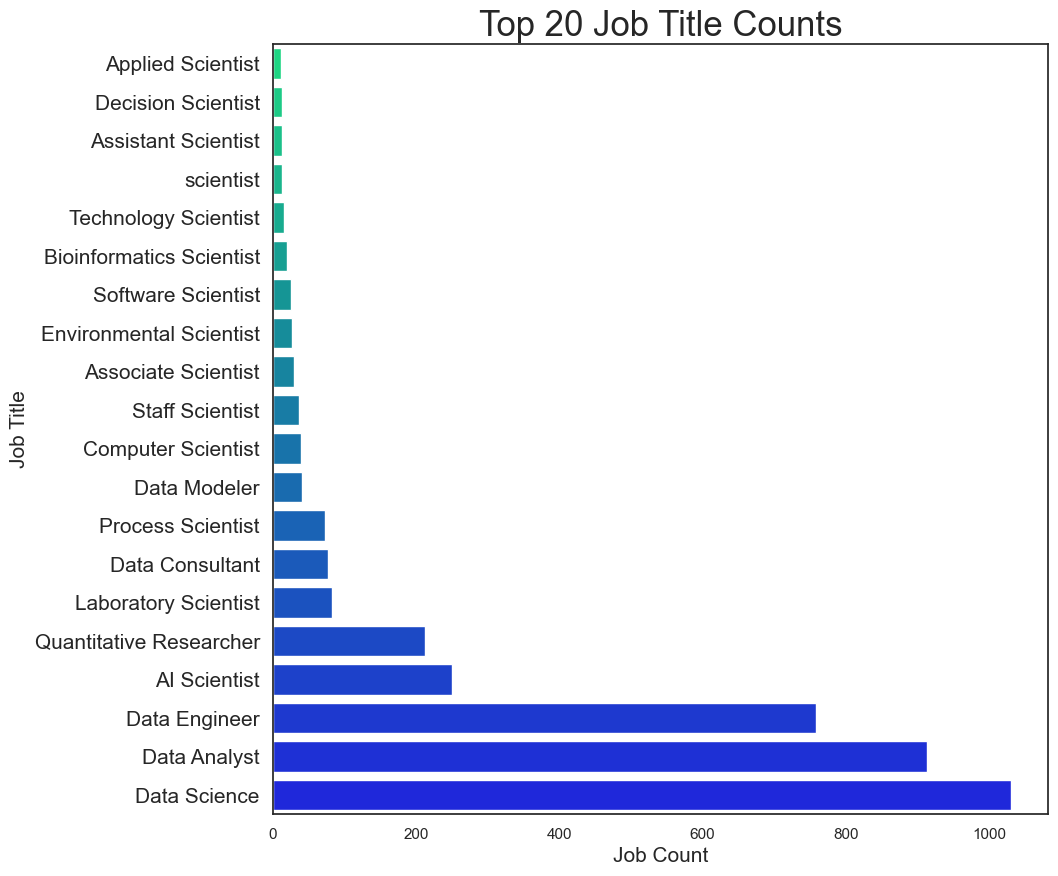

In [139]:
plt.subplots(figsize=(10,10))
splot = sns.barplot(x=df_job_title.value_counts()[0:20].sort_values(),y=df_job_title.value_counts()[0:20].sort_values().index, palette = 'winter_r')

plt.xlabel('Job Count',fontsize=15)
plt.ylabel('Job Title',fontsize=15)
plt.xticks()
plt.yticks(fontsize=15)
plt.title('Top 20 Job Title Counts',fontsize=25);

Nhận xét:

- Có thể thấy 3 nghề liên quan đến data được tuyển dụng nhiều nhất lần lượt là Data Science, Data Analyst, Data engineer


Tiếp theo ta thực hiện thống kê các nghề được các công ty lớn tuyển dụng nhiều nhất

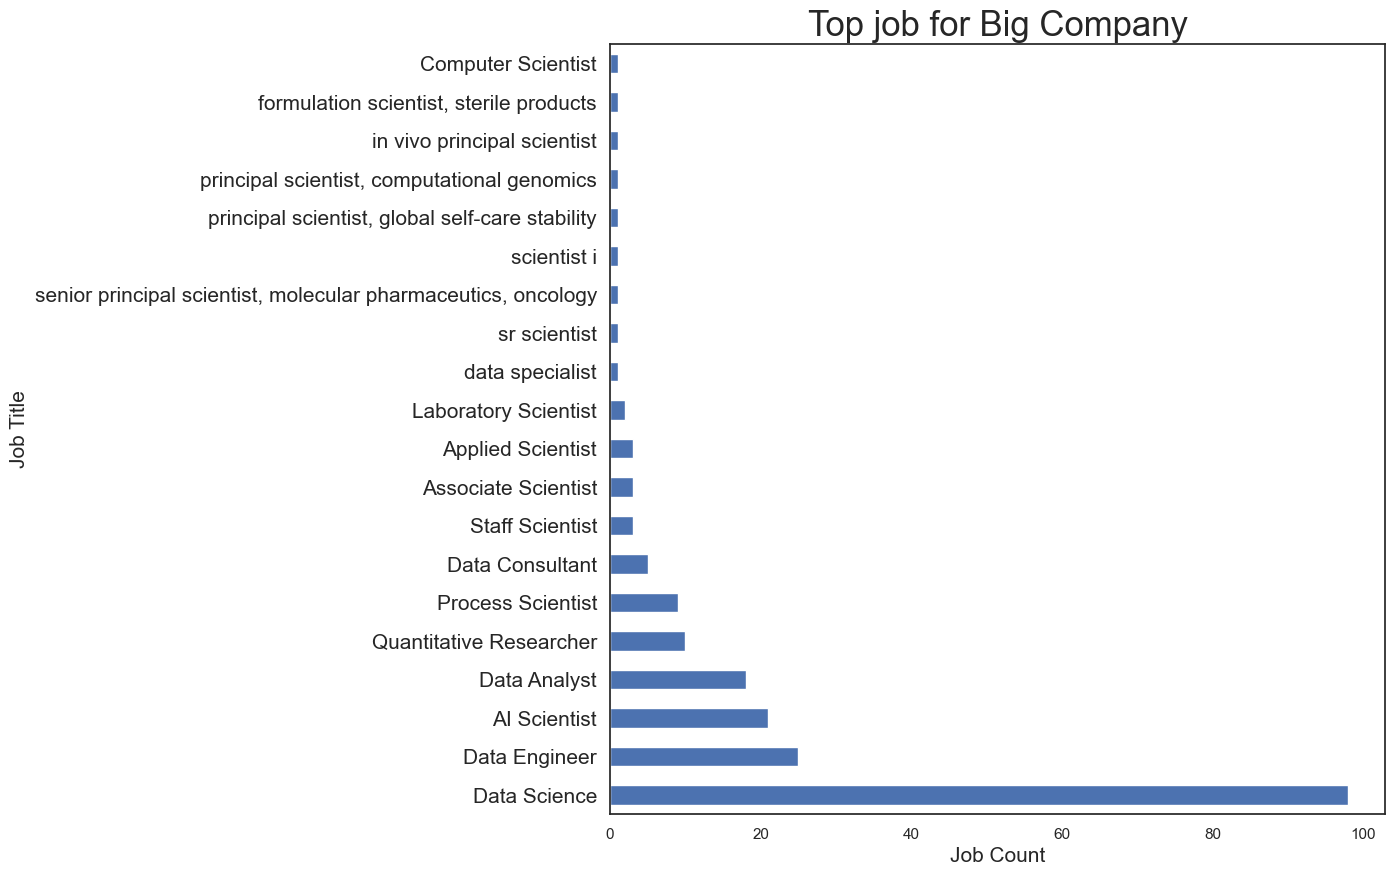

In [140]:
df_big_company_job = df_big_company.groupby('Job Title')['Company Name'].count()
df_big_company_job = df_big_company_job.sort_values(ascending=False)
plt.subplots(figsize=(10,10))
df_big_company_job[0:20].plot.barh()

plt.xlabel('Job Count',fontsize=15)
plt.ylabel('Job Title',fontsize=15)
plt.xticks()
plt.yticks(fontsize=15)
plt.title('Top job for Big Company',fontsize=25);

## 4. Đâu là nơi tuyển dụng nhân công về lĩnh vực Khoa học dữ liệu nhiều nhất?

### Lợi ích khi trả lời câu hỏi
- Biết được đâu là nơi tuyển dụng về lĩnh vực Khoa học dữ liệu nhiều nhất, đâu là nơi mà Khoa học dữ liệu đang phát triển mạnh nhất

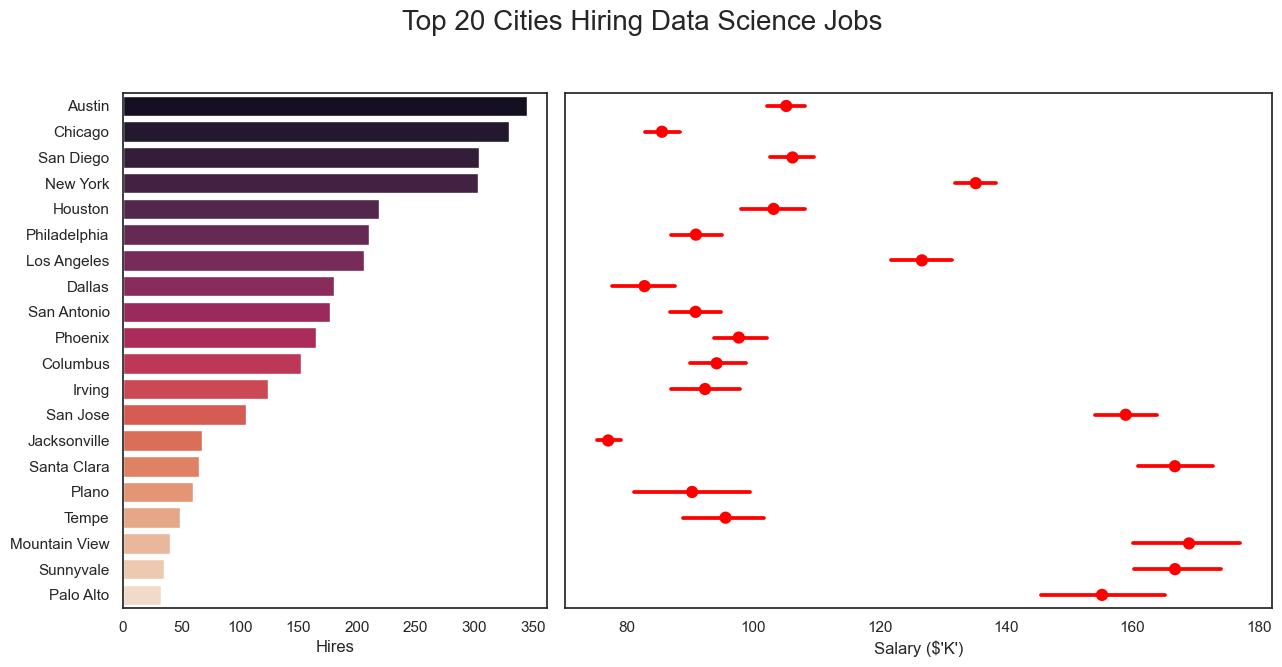

In [141]:
df_by_city=df.groupby('Location City')['Job Title'].count().reset_index().sort_values( 
    'Job Title',ascending=False).head(20).rename(columns={'Job Title':'Hires'})
Sal_by_city = df_by_city.merge(df,on='Location City',how='left')

sns.set(style="white")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='Location City',data=Sal_by_city,ax=ax_bar, palette='rocket').set(ylabel="")
sns.pointplot(x='Est_Salary',y='Location City',data=Sal_by_city, join=False,ax=ax_point, color = 'red').set(
    ylabel="",xlabel="Salary ($'K')")
plt.suptitle('Top 20 Cities Hiring Data Science Jobs',fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Nhận xét:
- Qua biểu đồ ta có thể thấy các thành phố tuyển dụng nhiều nhất đều ở Hoa Kỳ
- Những nơi tuyển dụng nhiều (Austin, Chicago,...) có mức lương trung bình hằng năm ở mức trung bình so với các nơi khác
- Những nơi tuyển dụng ít trong top 20 (Mounatain View, Sunnyvale, Palo Alto) có mức lương trung bình hằng năm rất cao (trên 150.000$/năm)

Nguyên nhân: có thể do các công ty ở Mounatain View, Sunnyvale, Palo Alto tuyển các nhân viên có trình độ cao nên số lượng tuyển ít nhưng mức lương lại rất cao. Ngược lại với các công ty ở Austin, Chicago,...